# Notebook: Create Term Frequency Analysis 

This notebook is used to calculate term frequencies.
<br>**Contributors:** [Nils Hellwig](https://github.com/NilsHellwig/) | [Markus Bink](https://github.com/MarkusBink/)

## Packages

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import nltk
import re
import os

## Parameters

In [55]:
PARTIES = ["SPD", "CDU_CSU", "GRUENE", "FDP", "AFD", "LINKE"]
DATASET_PATH_PREDICTIONS =  "../Datasets/complete_dataset_predictions/"
DATASET_PATH = "../Datasets/raw_dataset/"
OUTPUT_DIR = "../Word Frequencies/"

## Setup Packages

In [56]:
nltk.download('punkt')
nltk.download('stopwords')
STOPWORDS = set(stopwords.words("german"))
STOPWORDS.update(["mehr", "heute","https", "bundestag", "thread", "anzeigen", "https", "http", "www", "co"])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nils_hellwig/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nils_hellwig/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Code

### 1. Load Data

In [57]:
df = pd.DataFrame({})

for party in PARTIES:
    for subdir, _, files in os.walk(DATASET_PATH_PREDICTIONS + party):
        for file in files:
            if file.endswith('.csv') and subdir[len(DATASET_PATH_PREDICTIONS):] in PARTIES:
                # Get username of CSV file
                username = file[:-4]
                
                # Read CSV file as pandas dataframe
                df_acc_data = pd.read_csv(DATASET_PATH + party + "/" + file)
                ids = df_acc_data["id"].values
                df_acc_data = df_acc_data[["id","tweet", "source_party", "source_account", "date", "photos"]].reset_index().drop(columns='index')
                
                df_pred = pd.read_csv(DATASET_PATH_PREDICTIONS + party + "/" + file)
                df_pred = df_pred[df_pred["id"].isin(ids)][["pred"]].reset_index().drop(columns='index')
                
                matched_df = pd.concat([df_acc_data, df_pred], axis=1)
                matched_df = matched_df.rename(columns={"pred": "sentiment", "tweet": "text"})
                
                df = pd.concat([df, matched_df], axis=0)

df = df.reset_index().drop(columns='index')

In [58]:
df

,id,text,source_party,source_account,date,photos,sentiment
0,1347990396979200003,Wichtige wissenschaftliche Erkenntnis- nun mus...,SPD,KarambaDiaby,2021-01-09 19:35:29,[],0
1,1347953648354078726,@KarambaDiaby @HalleSpd @SPD_LSA Ich gratulier...,SPD,KarambaDiaby,2021-01-09 17:09:28,[],0
2,1347894948557950976,@KarambaDiaby @HalleSpd @SPD_LSA Herzlichen Gl...,SPD,KarambaDiaby,2021-01-09 13:16:13,[],0
3,1347883990460497925,@KarambaDiaby @HalleSpd @SPD_LSA Wann werden k...,SPD,KarambaDiaby,2021-01-09 12:32:40,[],1
4,1347879066687430658,@KarambaDiaby @HalleSpd @SPD_LSA Glückwunsch.,SPD,KarambaDiaby,2021-01-09 12:13:06,[],0
...,...,...,...,...,...,...,...
804438,1471756900815585280,@b_riexinger Klima oder Verkehr fast gleich......,LINKE,b_riexinger,2021-12-17 08:19:23,[],1
804439,1471756579699576832,@b_riexinger @Linksfraktion Na ob das noch lan...,LINKE,b_riexinger,2021-12-17 08:18:07,[],1
804440,1471748998126002181,@b_riexinger Ich wünsch Dir viel Erfolg.,LINKE,b_riexinger,2021-12-17 07:47:59,[],0
804441,1471663294209536000,"@b_riexinger Nun, da gibt es ja genügend zu tu...",LINKE,b_riexinger,2021-12-17 02:07:26,[],2


In [59]:
import ast

# Konvertieren Sie die Spalte "photos" in eine Liste von Listen
df['photos'] = df['photos'].apply(lambda x: ast.literal_eval(x))

In [60]:
df_with_photos = df[df['photos'].apply(lambda x: len(x) > 0)]
df_with_photos

,id,text,source_party,source_account,date,photos,sentiment
37,1365215403161636867,@bob_fnord @AndrejHunko @HeikeHaensel @SBarrie...,SPD,KarambaDiaby,2021-02-26 08:21:31,[https://pbs.twimg.com/media/EvI4LGvXYAM94_U.jpg],1
42,1357679108331892738,@KarambaDiaby Für diese Aussage hätten Sie von...,SPD,KarambaDiaby,2021-02-05 13:14:58,[https://pbs.twimg.com/media/Etdx7lRXcAEZAKC.jpg],1
50,1375885959078756353,@KarambaDiaby https://t.co/98QVLRin6V,SPD,KarambaDiaby,2021-03-27 19:02:30,[https://pbs.twimg.com/media/Exgg_PnXMAYEW0t.jpg],2
62,1370749427565101061,"Starke Person, spannender Lebensweg. Ich freue...",SPD,KarambaDiaby,2021-03-13 14:51:45,[https://pbs.twimg.com/media/EwXhVTNXIAQrEO7.jpg],0
64,1370667452036710401,Da geht man morgens am Wochenende ganz chillig...,SPD,KarambaDiaby,2021-03-13 09:26:00,[https://pbs.twimg.com/media/EwWWyAXWgAYcXmn.jpg],0
...,...,...,...,...,...,...,...
804306,1446712033232175105,@Tini68274439 @Haegar3 @b_riexinger https://t...,LINKE,b_riexinger,2021-10-09 06:40:01,[https://pbs.twimg.com/media/FBPA7UIXsAE3uHK.jpg],2
804307,1446709991805751297,@realjonaswd This cc: @katjakipping @b_riexin...,LINKE,b_riexinger,2021-10-09 06:31:55,[https://pbs.twimg.com/media/FBO-9t7WEAkN-fA.jpg],1
804364,1463028379935035392,@Lutfi23444 @Steven_Sting @b_riexinger https:...,LINKE,b_riexinger,2021-11-23 06:15:22,[https://pbs.twimg.com/media/FE24jb1WYAcE1gD.jpg],2
804386,1471084101285330949,@Schulstreik2021 @n_treu @bckrmx @Linksfraktio...,LINKE,b_riexinger,2021-12-15 11:45:55,[https://pbs.twimg.com/media/FGpWnSNXsAMQvSq.png],2


In [66]:
df_with_photos[df_with_photos["id"] == 1470654295586574338]

,id,text,source_party,source_account,date,photos,sentiment
602435,1470654295586574338,@dabi_1001 @Ricarda_Lang @Die_Gruenen AfD-Chef...,GRUENE,Die_Gruenen,2021-12-14 07:18:02,[https://pbs.twimg.com/tweet_video_thumb/FGjQR...,0


Bilder aus Zeile 580526 1409032370037141504 ['https://pbs.twimg.com/tweet_video_thumb/E43jd6xXIAMbtif.jpg']
https://pbs.twimg.com/tweet_video_thumb/E43jd6xXIAMbtif.jpg


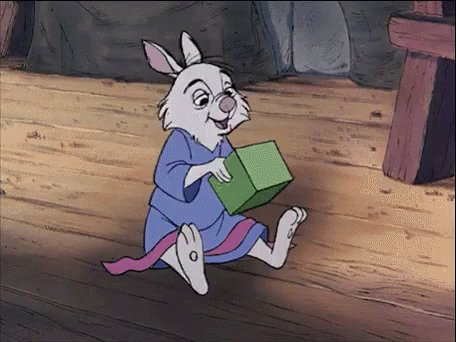

Bilder aus Zeile 537389 1474023592379695110 ['https://pbs.twimg.com/media/FHTIh6xWUAsqk8M.jpg']
https://pbs.twimg.com/media/FHTIh6xWUAsqk8M.jpg


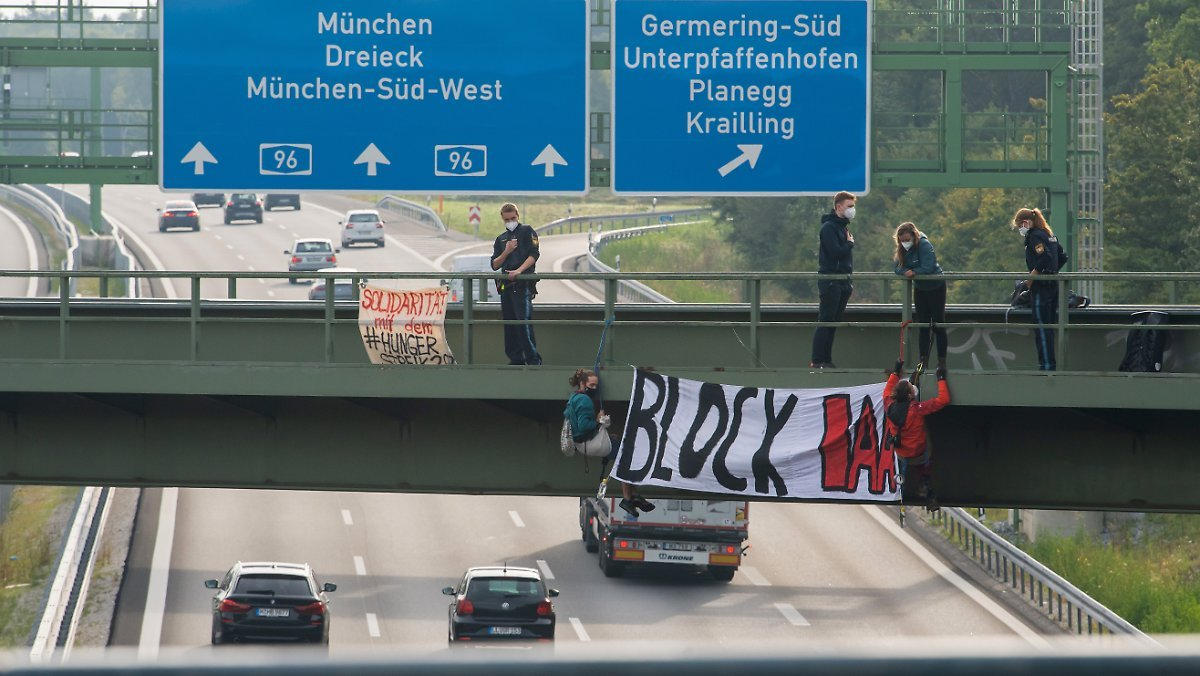

Bilder aus Zeile 562589 1369730893078757380 ['https://pbs.twimg.com/media/EwJC_L-WgAABNtV.jpg']
https://pbs.twimg.com/media/EwJC_L-WgAABNtV.jpg


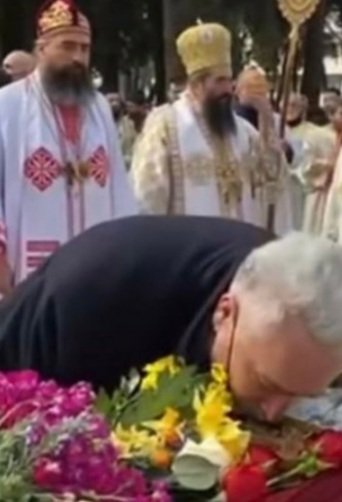

Bilder aus Zeile 330507 1379230940958973958 ['https://pbs.twimg.com/media/EyQDOx8XEAIktfn.jpg']
https://pbs.twimg.com/media/EyQDOx8XEAIktfn.jpg


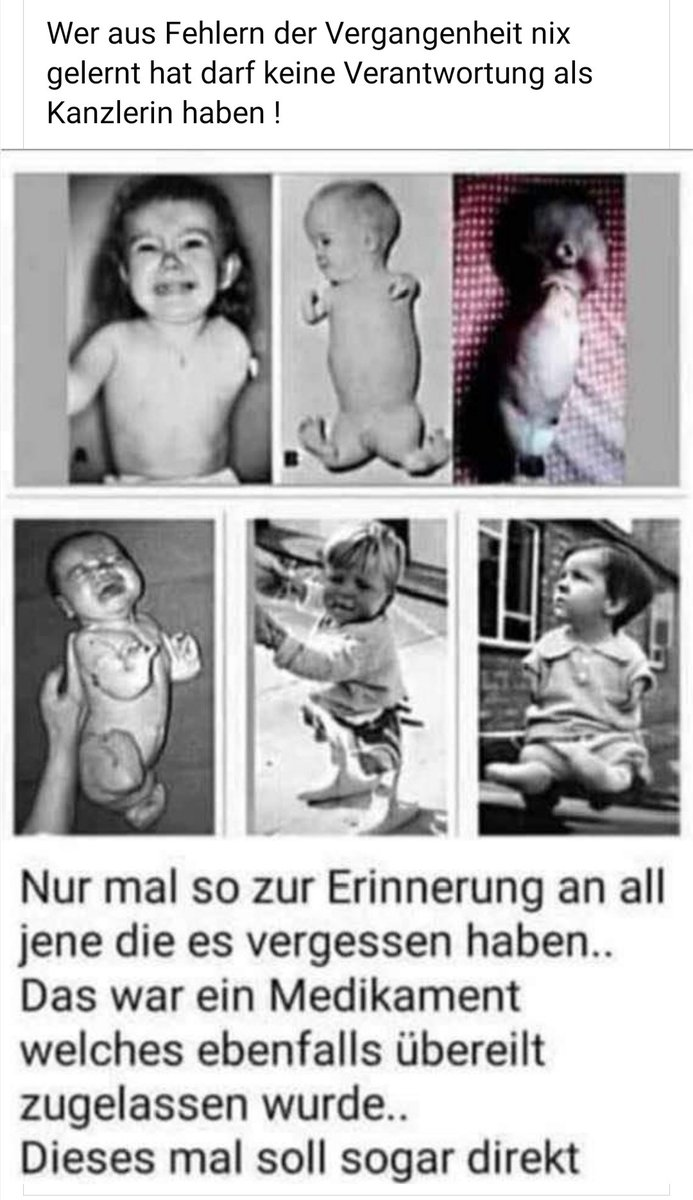

Bilder aus Zeile 622273 1403719348162793477 ['https://pbs.twimg.com/media/E3sDTZqWQAoujnr.jpg']
https://pbs.twimg.com/media/E3sDTZqWQAoujnr.jpg


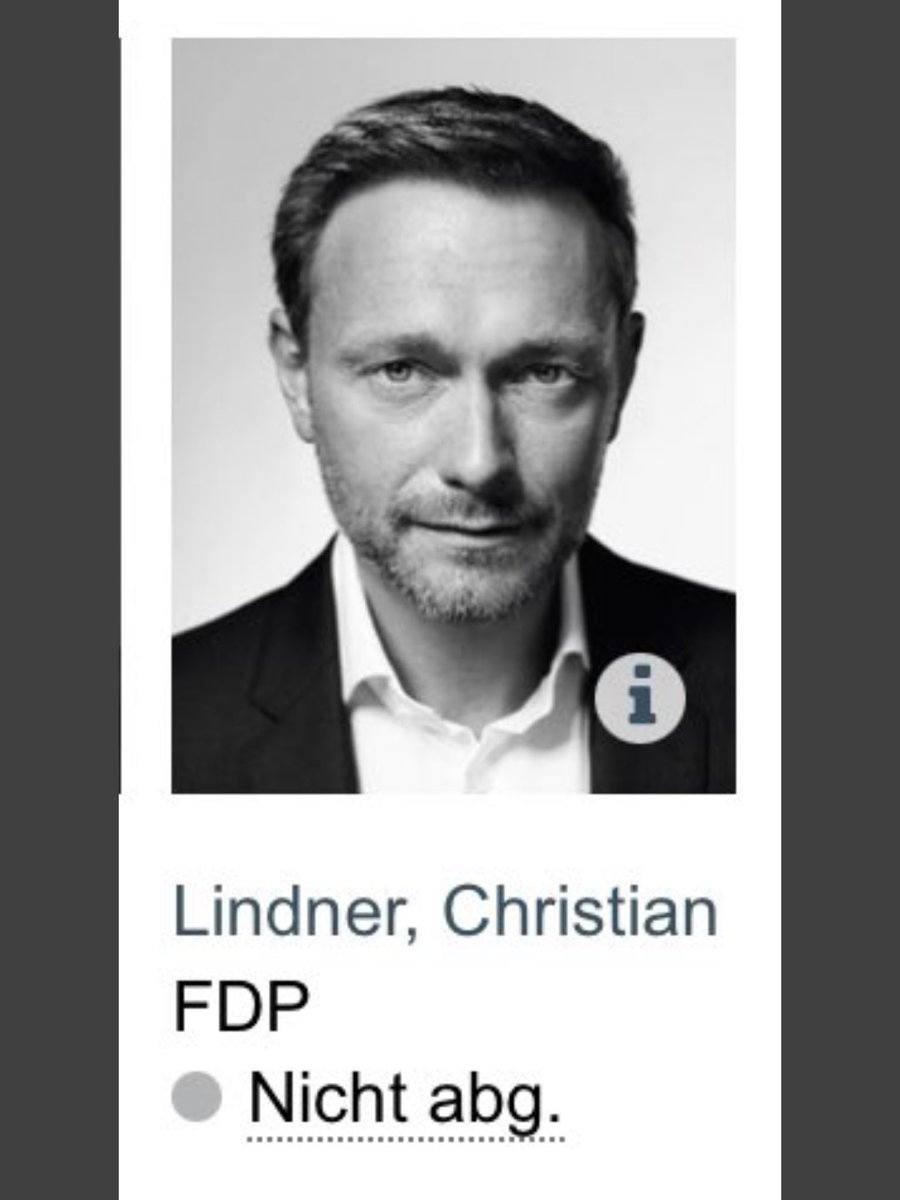

Bilder aus Zeile 352546 1458307617944743938 ['https://pbs.twimg.com/media/FDzzDHFWUAY_euB.jpg']
https://pbs.twimg.com/media/FDzzDHFWUAY_euB.jpg


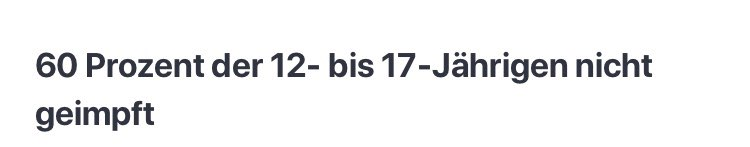

In [68]:
import requests
from io import BytesIO
from PIL import Image

# Wählen Sie zwei zufällige Zeilen aus dem DataFrame aus
random_rows = df_with_photos.sample(6)

# Iterieren Sie über die Zeilen und zeigen Sie die Bilder an
for index, row in random_rows.iterrows():
    print("Bilder aus Zeile", index, row["id"], row["photos"])
    for photo_url in row['photos']:
        print(photo_url)
        # Herunterladen und öffnen jedes Bild
        response = requests.get(photo_url)
        image = Image.open(BytesIO(response.content))
        display(image)
